In [25]:
import pandas as pd
import json

with open('data/sections/swift_sections.json') as json_file:  
    sections_json = json.load(json_file)

In [33]:
data_frame = pd.DataFrame(sections_json)
data_frame.head()

,file_id,heading_level,readme_file_name,section_codes,section_id,title
0,1,4,Quick.Quick.md,"[1, 3]",1,Nimble
1,1,2,Quick.Quick.md,"[3, 4]",2,Swift Version
2,1,2,Quick.Quick.md,"[3, 6]",3,Documentation
3,1,2,Quick.Quick.md,[6],4,Projects using Quick
4,1,2,Quick.Quick.md,"[1, 6]",5,Who uses Quick


In [39]:
print(f'{len(data_frame["readme_file_name"].unique())} unique repos')
print(f'{len(data_frame)} sections')

100 unique repos
2473 sections


In [52]:
data_frame['first_section_code'] = data_frame['section_codes'].apply(lambda codes: codes[0])

In [74]:
section_frequency_df = pd.DataFrame(data_frame['first_section_code'].value_counts(normalize=True))
section_frequency_df['first_section_code'] = section_frequency_df['first_section_code'] * 100
section_frequency_df['count'] = data_frame['first_section_code'].value_counts(normalize=False)
section_frequency_df.columns = ['Percentage', 'Count']
section_frequency_df.index.name = 'Section Code'
section_frequency_df.sort_index()

,Percentage,Count
Section Code,,
1,23.372422,578
3,46.663971,1154
4,1.496159,37
5,4.367165,108
6,4.326729,107
7,1.657905,41
8,0.161747,4
998,5.580267,138
999,12.373635,306


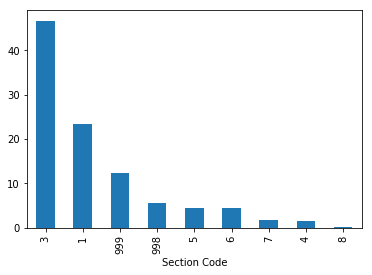

In [87]:
section_frequency_df['Percentage'].plot(kind='bar')

In [148]:
code_to_section_name = {
    1: 'WHAT/WHY',
    3: 'HOW',
    4: 'WHEN',
    5: 'WHO',
    6: 'REFERENCES',
    7: 'CONTRIBUTION',
    8: 'OTHER',
    999: 'EXCLUSION',
    998: 'UNCLASSIFIED'
}

In [146]:
from IPython.display import display, HTML

CSS = """
div.cell:nth-child(9) .output {
    flex-direction: row;
    flex-wrap: wrap;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [150]:
codes_dataframes = []
for code, group in data_frame.groupby('first_section_code'):
    unique_titles_data_frame = pd.DataFrame(group['title'].value_counts())
    unique_titles_data_frame.index.name = f'{code_to_section_name[code]} Sections'
    unique_titles_data_frame.columns = ['occurences']
    codes_dataframes.append(unique_titles_data_frame)
    
# g1 = pd.DataFrame(d[1]['title'].value_counts())
# g1.index.name = "Section"

for index, code_data_frame in enumerate(codes_dataframes):
    display(code_data_frame.head())

,occurences
WHAT/WHY Sections,
Features,20
About,6
Overview,4
Keyboard,3
Core Data,3


,occurences
HOW Sections,
Usage,47
Installation,45
Carthage,27
Example,21
CocoaPods,18


,occurences
WHEN Sections,
Change Log,4
Roadmap,2
Exponential,1
compatibility,1
React Native,1


,occurences
WHO Sections,
License,46
Author,10
Credits,6
Contributors,5
Contact,5


,occurences
REFERENCES Sections,
Documentation,13
Communication,4
Resources,3
Reactive Extensions,2
Contents,2


,occurences
CONTRIBUTION Sections,
Contributing,18
Contribute,3
Getting involved,2
Communication,2
Collaboration,1


,occurences
OTHER Sections,
Header,1
Much More...,1
Tutorial,1
Let users skip the tour,1


,occurences
UNCLASSIFIED Sections,
To Do,2
Reach me,2
Customized,2
Commits,1
TeX,1


,occurences
EXCLUSION Sections,
,72
@abstr_code_section,10
Requirements,9
CocoaPods,6
subscripting,4
